In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn import metrics

import pickle

In [29]:
df = pd.read_csv('../datasets/original/Dataset.csv')
df.head()

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,...,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID-19
0,Yes,Yes,Yes,Yes,Yes,No,No,No,No,Yes,...,Yes,Yes,No,Yes,No,Yes,Yes,No,No,Yes
1,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,No,...,Yes,No,No,No,Yes,Yes,No,No,No,Yes
2,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,...,Yes,Yes,Yes,No,No,No,No,No,No,Yes
3,Yes,Yes,Yes,No,No,Yes,No,No,Yes,Yes,...,No,No,Yes,No,Yes,Yes,No,No,No,Yes
4,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,...,No,Yes,No,Yes,No,Yes,No,No,No,Yes


# Data Analysis

In [30]:
df.describe()

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,...,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID-19
count,5434,5434,5434,5434,5434,5434,5434,5434,5434,5434,...,5434,5434,5434,5434,5434,5434,5434,5434,5434,5434
unique,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,1,1,2
top,Yes,Yes,Yes,Yes,Yes,No,No,Yes,No,No,...,Yes,No,No,Yes,No,Yes,No,No,No,Yes
freq,3620,4273,4307,3953,2952,2920,2869,2736,2911,2846,...,2821,2883,2983,2726,2924,2820,3172,5434,5434,4383


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5434 entries, 0 to 5433
Data columns (total 21 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   Breathing Problem                        5434 non-null   object
 1   Fever                                    5434 non-null   object
 2   Dry Cough                                5434 non-null   object
 3   Sore throat                              5434 non-null   object
 4   Running Nose                             5434 non-null   object
 5   Asthma                                   5434 non-null   object
 6   Chronic Lung Disease                     5434 non-null   object
 7   Headache                                 5434 non-null   object
 8   Heart Disease                            5434 non-null   object
 9   Diabetes                                 5434 non-null   object
 10  Hyper Tension                            5434 non-null   obj

In [32]:
df.isna().sum()

Breathing Problem                          0
Fever                                      0
Dry Cough                                  0
Sore throat                                0
Running Nose                               0
Asthma                                     0
Chronic Lung Disease                       0
Headache                                   0
Heart Disease                              0
Diabetes                                   0
Hyper Tension                              0
Fatigue                                    0
Gastrointestinal                           0
Abroad travel                              0
Contact with COVID Patient                 0
Attended Large Gathering                   0
Visited Public Exposed Places              0
Family working in Public Exposed Places    0
Wearing Masks                              0
Sanitization from Market                   0
COVID-19                                   0
dtype: int64

In [33]:
df.isnull().sum()

Breathing Problem                          0
Fever                                      0
Dry Cough                                  0
Sore throat                                0
Running Nose                               0
Asthma                                     0
Chronic Lung Disease                       0
Headache                                   0
Heart Disease                              0
Diabetes                                   0
Hyper Tension                              0
Fatigue                                    0
Gastrointestinal                           0
Abroad travel                              0
Contact with COVID Patient                 0
Attended Large Gathering                   0
Visited Public Exposed Places              0
Family working in Public Exposed Places    0
Wearing Masks                              0
Sanitization from Market                   0
COVID-19                                   0
dtype: int64

<AxesSubplot:xlabel='COVID-19', ylabel='count'>

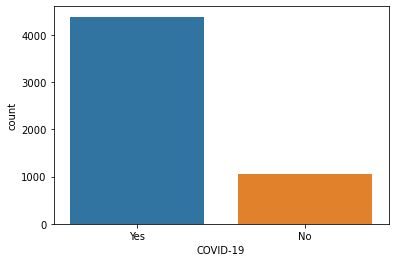

In [34]:
sns.countplot(x='COVID-19', data=df)

In [35]:
df.columns

Index(['Breathing Problem', 'Fever', 'Dry Cough', 'Sore throat',
       'Running Nose', 'Asthma', 'Chronic Lung Disease', 'Headache',
       'Heart Disease', 'Diabetes', 'Hyper Tension', 'Fatigue ',
       'Gastrointestinal ', 'Abroad travel', 'Contact with COVID Patient',
       'Attended Large Gathering', 'Visited Public Exposed Places',
       'Family working in Public Exposed Places', 'Wearing Masks',
       'Sanitization from Market', 'COVID-19'],
      dtype='object')

<AxesSubplot:xlabel='Running Nose', ylabel='count'>

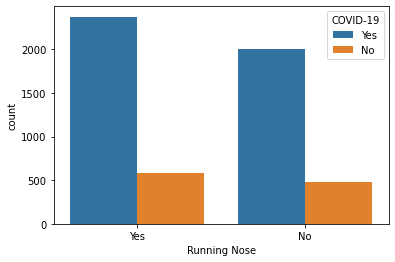

In [36]:
sns.countplot(x='Running Nose', data=df, hue='COVID-19')


<AxesSubplot:xlabel='Sore throat', ylabel='count'>

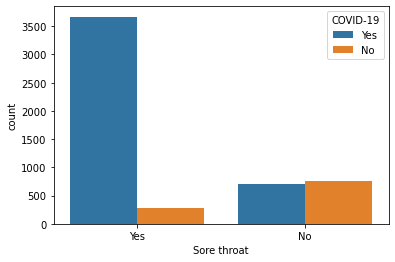

In [37]:
sns.countplot(x='Sore throat', data=df, hue='COVID-19')


<AxesSubplot:xlabel='Fever', ylabel='count'>

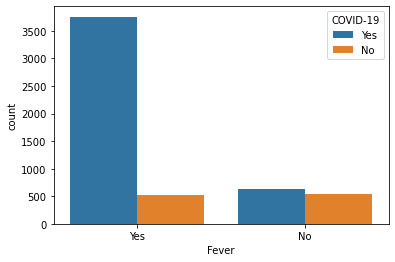

In [38]:
sns.countplot(x='Fever', data=df, hue='COVID-19')


<AxesSubplot:xlabel='Dry Cough', ylabel='count'>

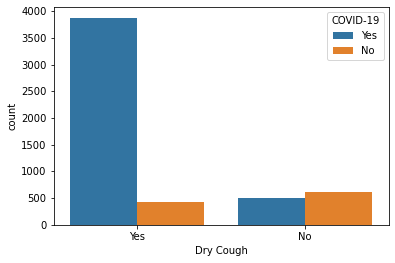

In [39]:
sns.countplot(x='Dry Cough', data=df, hue='COVID-19')


<AxesSubplot:xlabel='Breathing Problem', ylabel='count'>

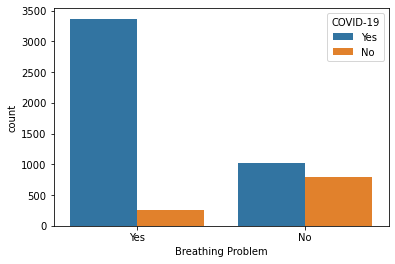

In [40]:
sns.countplot(x='Breathing Problem', data=df, hue='COVID-19')

In [41]:
df.head()

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,...,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID-19
0,Yes,Yes,Yes,Yes,Yes,No,No,No,No,Yes,...,Yes,Yes,No,Yes,No,Yes,Yes,No,No,Yes
1,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,No,...,Yes,No,No,No,Yes,Yes,No,No,No,Yes
2,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,...,Yes,Yes,Yes,No,No,No,No,No,No,Yes
3,Yes,Yes,Yes,No,No,Yes,No,No,Yes,Yes,...,No,No,Yes,No,Yes,Yes,No,No,No,Yes
4,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,...,No,Yes,No,Yes,No,Yes,No,No,No,Yes


In [42]:
e=LabelEncoder()

df['Breathing Problem'] = e.fit_transform(df['Breathing Problem'])
df['Fever'] = e.fit_transform(df['Fever'])
df['Dry Cough'] = e.fit_transform(df['Dry Cough'])
df['Sore throat'] = e.fit_transform(df['Sore throat'])
df['Running Nose'] = e.fit_transform(df['Running Nose'])
df['Asthma'] = e.fit_transform(df['Asthma'])
df['Chronic Lung Disease'] = e.fit_transform(df['Chronic Lung Disease'])
df['Headache'] = e.fit_transform(df['Headache'])
df['Heart Disease'] = e.fit_transform(df['Heart Disease'])
df['Diabetes'] = e.fit_transform(df['Diabetes'])
df['Hyper Tension'] = e.fit_transform(df['Hyper Tension'])
df['Abroad travel'] = e.fit_transform(df['Abroad travel'])
df['Contact with COVID Patient'] = e.fit_transform(
    df['Contact with COVID Patient'])
df['Attended Large Gathering'] = e.fit_transform(
    df['Attended Large Gathering'])
df['Visited Public Exposed Places'] = e.fit_transform(
    df['Visited Public Exposed Places'])
df['Family working in Public Exposed Places'] = e.fit_transform(
    df['Family working in Public Exposed Places'])
df['Wearing Masks'] = e.fit_transform(df['Wearing Masks'])
df['Sanitization from Market'] = e.fit_transform(
    df['Sanitization from Market'])
df['COVID-19'] = e.fit_transform(df['COVID-19'])
df['Dry Cough'] = e.fit_transform(df['Dry Cough'])
df['Sore throat'] = e.fit_transform(df['Sore throat'])
df['Gastrointestinal '] = e.fit_transform(df['Gastrointestinal '])
df['Fatigue '] = e.fit_transform(df['Fatigue '])


In [43]:
df.head()

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,...,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID-19
0,1,1,1,1,1,0,0,0,0,1,...,1,1,0,1,0,1,1,0,0,1
1,1,1,1,1,0,1,1,1,0,0,...,1,0,0,0,1,1,0,0,0,1
2,1,1,1,1,1,1,1,1,0,1,...,1,1,1,0,0,0,0,0,0,1
3,1,1,1,0,0,1,0,0,1,1,...,0,0,1,0,1,1,0,0,0,1
4,1,1,1,1,1,0,1,1,1,1,...,0,1,0,1,0,1,0,0,0,1


In [44]:
pearson_corr = df.corr(method='pearson')
pearson_corr


,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,...,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID-19
Breathing Problem,1.000000,0.089903,0.159562,0.303768,0.055190,0.075318,-0.098291,-0.062172,-0.073366,0.055427,...,0.000561,-0.075390,0.117795,0.214634,0.200304,0.066688,0.018295,NaN,NaN,0.443764
Fever,0.089903,1.000000,0.127580,0.322235,0.081758,0.073953,-0.025160,-0.035416,-0.031462,0.050286,...,-0.060458,-0.008067,0.128726,0.164704,0.070490,0.002252,0.012102,NaN,NaN,0.352891
Dry Cough,0.159562,0.127580,1.000000,0.213907,-0.030763,0.086843,-0.043664,-0.035912,0.047566,-0.006593,...,-0.039909,0.008251,0.331418,0.128330,0.117963,0.086176,0.163102,NaN,NaN,0.464292
Sore throat,0.303768,0.322235,0.213907,1.000000,0.039450,0.081377,-0.050440,-0.015971,0.002177,0.001938,...,-0.023290,0.025886,0.205986,0.189251,0.216438,0.079055,0.104378,NaN,NaN,0.502848
Running Nose,0.055190,0.081758,-0.030763,0.039450,1.000000,-0.022763,-0.014376,0.068479,-0.056750,0.042961,...,0.007026,-0.014673,0.034526,0.003776,0.061099,0.032568,-0.061323,NaN,NaN,-0.005657
Asthma,0.075318,0.073953,0.086843,0.081377,-0.022763,1.000000,-0.033771,0.037064,0.076783,-0.012060,...,0.006564,0.101909,0.068286,0.005046,-0.044592,0.020941,-0.115679,NaN,NaN,0.089930
Chronic Lung Disease,-0.098291,-0.025160,-0.043664,-0.050440,-0.014376,-0.033771,1.000000,-0.050480,-0.039860,0.046789,...,-0.047655,-0.050333,-0.088854,-0.062482,-0.020548,-0.093049,0.038343,NaN,NaN,-0.056837
Headache,-0.062172,-0.035416,-0.035912,-0.015971,0.068479,0.037064,-0.050480,1.000000,0.048471,0.032390,...,0.052035,0.097778,0.043589,-0.082101,-0.162992,-0.005790,-0.012625,NaN,NaN,-0.027793
Heart Disease,-0.073366,-0.031462,0.047566,0.002177,-0.056750,0.076783,-0.039860,0.048471,1.000000,-0.032956,...,-0.058925,0.004121,-0.020761,-0.025593,-0.045437,0.086169,0.035000,NaN,NaN,0.027072
Diabetes,0.055427,0.050286,-0.006593,0.001938,0.042961,-0.012060,0.046789,0.032390,-0.032956,1.000000,...,-0.043903,0.040651,0.039013,-0.085696,-0.061650,-0.078212,0.097696,NaN,NaN,0.040627


<AxesSubplot:>

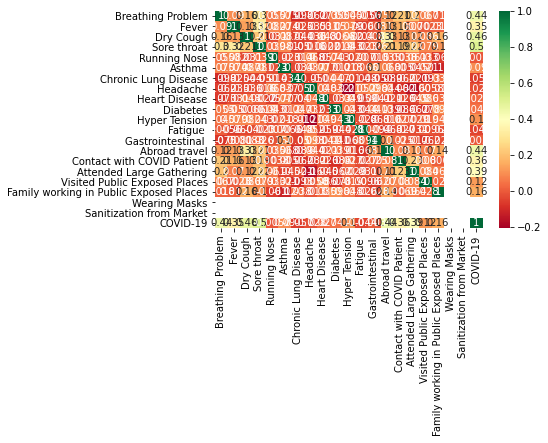

In [45]:
sns.heatmap(pearson_corr, xticklabels=pearson_corr.columns,
            yticklabels=pearson_corr.columns, annot=True, cmap='RdYlGn')


# Training

In [46]:
X = df.drop(['COVID-19'], axis=1)
y = df['COVID-19']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [47]:
mlp_model = MLPClassifier(hidden_layer_sizes=(100, 100), activation='relu',
                     solver='adam', learning_rate_init=0.1, max_iter=1000)
mlp_model.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(100, 100), learning_rate_init=0.1,
              max_iter=1000)

In [48]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

# Evaluation

In [49]:
y_pred = model.predict(X_test)


In [50]:
y_pred_mlp = mlp_model.predict(X_test)

In [51]:
print("Logistic Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("MLP Accuracy:", metrics.accuracy_score(y_test, y_pred_mlp))

Logistic Accuracy: 0.9724011039558418
MLP Accuracy: 0.9788408463661453


In [52]:
print("Logistic Precision:", metrics.precision_score(y_test, y_pred))
print("Logistic Recall:", metrics.recall_score(y_test, y_pred))
print("Logistic F1-score:", metrics.f1_score(y_test, y_pred))
print("MLP Precision:", metrics.precision_score(y_test, y_pred_mlp))
print("MLP Recall:", metrics.recall_score(y_test, y_pred_mlp))
print("MLP F1-score:", metrics.f1_score(y_test, y_pred_mlp))

Logistic Precision: 0.9755011135857461
Logistic Recall: 0.9909502262443439
Logistic F1-score: 0.9831649831649832
MLP Precision: 0.9965397923875432
MLP Recall: 0.9773755656108597
MLP F1-score: 0.9868646487721302


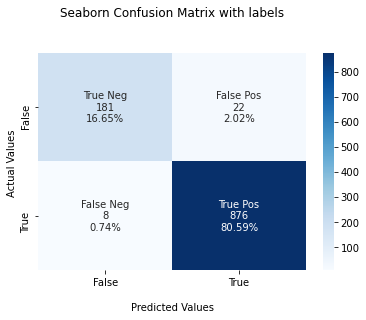

In [53]:
cm = metrics.confusion_matrix(y_test, y_pred, labels=model.classes_)
group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names, group_counts, group_percentages)]

labels = np.asarray(labels).reshape(2, 2)

ax = sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ')

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False', 'True'])
ax.yaxis.set_ticklabels(['False', 'True'])

## Display the visualization of the Confusion Matrix.
plt.show()


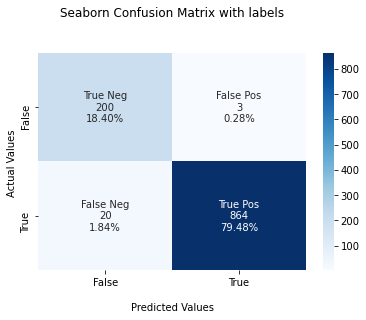

In [54]:
cm = metrics.confusion_matrix(y_test, y_pred_mlp, labels=model.classes_)
group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names, group_counts, group_percentages)]

labels = np.asarray(labels).reshape(2, 2)

ax = sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ')

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False', 'True'])
ax.yaxis.set_ticklabels(['False', 'True'])

## Display the visualization of the Confusion Matrix.
plt.show()


In [56]:
pickle.dump(mlp_model, open('../models/model.pkl', 'wb'))


In [58]:
df.columns

Index(['Breathing Problem', 'Fever', 'Dry Cough', 'Sore throat',
       'Running Nose', 'Asthma', 'Chronic Lung Disease', 'Headache',
       'Heart Disease', 'Diabetes', 'Hyper Tension', 'Fatigue ',
       'Gastrointestinal ', 'Abroad travel', 'Contact with COVID Patient',
       'Attended Large Gathering', 'Visited Public Exposed Places',
       'Family working in Public Exposed Places', 'Wearing Masks',
       'Sanitization from Market', 'COVID-19'],
      dtype='object')